# Example run

## Some includes

In [2]:
using Random
RNG = MersenneTwister(1234)
using BenchmarkTools

using ConstrainedGaussians

[ Info: Precompiling ConstrainedGaussians [72cb5a96-92ad-43ae-9774-2d852a9e5056] (cache misses: include_dependency fsize change (4))


## Setup

In [3]:
mu = rand(RNG)
sig = rand(RNG)

dom = (mu+0.5*sig,mu+3.0*sig)
d = ConstrainedGaussian1D(mu,sig,dom)
N = Int(1e6)

1000000

## Generate samples

In [4]:
samples = generate_CPU(RNG,d,N ; batch_size=1000) # not enough elements????

1000288-element Vector{Float64}:
 1.0742340558435985
 1.0730781173125767
 1.9896250113762497
 3.105113427930066
 1.8574666488244633
 1.8159372698439835
 1.109548243172165
 1.5770354160050553
 1.3590575226781938
 1.1914585945695642
 1.8759880573744998
 1.7139305526129174
 3.381209129317833
 ⋮
 1.4397024632246285
 1.0885387589109017
 1.5760739229042762
 1.3555945603290158
 1.3664612587409264
 1.1962789622099628
 2.165842345107823
 1.2487352157877882
 1.1257704298484303
 1.2414722995661573
 1.1095129273547224
 1.6673401880835255

## Plot samples in histogram and compare to target distribution

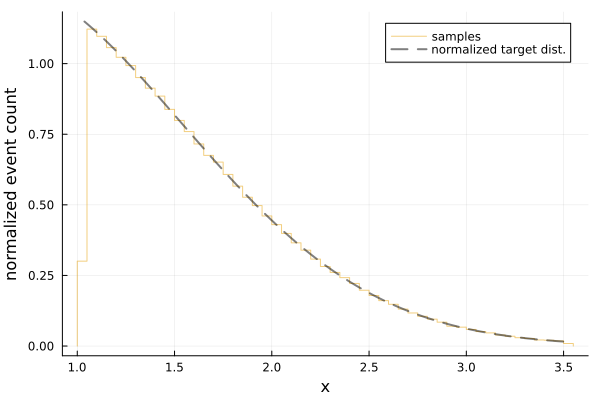

In [5]:
plot_compare(samples,d)

## Some Benchmarking

In [6]:
N_bench = 10000

@benchmark generate_CPU($RNG,$d,$N_bench)

BenchmarkTools.Trial: 10000 samples with 1 evaluation per sample.
 Range (min … max):  364.083 μs …  12.503 ms  ┊ GC (min … max):  0.00% … 96.29%
 Time  (median):     436.125 μs               ┊ GC (median):     0.00%
 Time  (mean ± σ):   486.206 μs ± 306.643 μs  ┊ GC (mean ± σ):  10.54% ± 14.32%

  ▅▄▇█▆▄▂▁                                                      ▂
  ████████▇▅▃▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃▃▁▆▅▅▆▅▅▆▅▇▇▇███▇▇▇ █
  364 μs        Histogram: log(frequency) by time       1.73 ms <

 Memory estimate: 1.04 MiB, allocs estimate: 507.

In [7]:
@benchmark ConstrainedGaussians.generate_batch_CPU($RNG,$N_bench,$d)

BenchmarkTools.Trial: 10000 samples with 1 evaluation per sample.
 Range (min … max):  116.000 μs …  21.065 ms  ┊ GC (min … max):  0.00% … 99.09%
 Time  (median):     136.666 μs               ┊ GC (median):     0.00%
 Time  (mean ± σ):   174.068 μs ± 504.927 μs  ┊ GC (mean ± σ):  20.28% ±  8.61%

         ▁█▇▄▁                                                   
  ▆▃▂▂▂▂▃█████▇▅▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▁▂▂▁▂ ▃
  116 μs           Histogram: frequency by time          244 μs <

 Memory estimate: 340.20 KiB, allocs estimate: 18.